# KMeans及其变种

## 算法流程

#### Kmeans[1,3]
  1. 在样本集中随机选取$K$个点作为初始聚类中心$C=\{c_1, c_2, ..., c_k\}$;
  2. 针对样本集中每个点到$K$个聚类中心聚类，将其归类到距离最小的类别上；
  3. 针对每个类别，重新类别中心$c_i = \frac{1}{|C_i|}\sum_{x\in C_i}x$;
  4. 重复2，3步骤，直到聚类中心的位置不再发生变化。
  
#### KMeans++[1,2]
  1. 从数据集$\chi$中随机选取一个样本作为聚类中心$c_1$;
  2. 选择一个新中心$c_i$，每个样本$x \in \chi$被选中的概率为$ \frac{D(x)^2}{\sum_{x\in \chi}{D(x)^2}}$, 其中$D(X)$表示x与最近的中心距离;
  3. 重复2，直到选择出$K$个中心;
  4. 开始Kmeans算法流程。

#### Kernel-KMeans[4,5,6,7]
  
#### ISODATA[5]


## reference
+ [[1] k-means++: The Advantages of Careful Seeding, David Arthur and Sergei Vassilvitskii, 2017](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)
+ [[2] WIKI: k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B)
+ [[3] 知乎: KMeans算法优缺点](https://www.zhihu.com/question/31296149)
+ [[4] Kernel k-means, Spectral Clustering and Normalized Cuts](http://www.cs.utexas.edu/users/inderjit/public_papers/kdd_spectral_kernelkmeans.pdf)
+ [[5] K-means聚类算法的三种改进(K-means++,ISODATA,Kernel K-means)介绍与对比](https://www.cnblogs.com/yixuan-xu/p/6272208.html)
+ [[6] 核方法和soft SVM](https://blog.csdn.net/liyaohhh/article/details/51026797)
+ [[7] 加权核k均值算法理解及其实现](https://www.cnblogs.com/subaiBlog/p/6271315.html)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from chinese_calendar import get_holidays, is_holiday, holidays, get_holiday_detail
from datetime import datetime as dt

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD, RandomizedPCA
from sklearn.metrics import pairwise

from cluster.models import KMeans, MiniBatchKMeans, SpectralClustering 
from cluster.dataset import load_time_series
from cluster.visual import plot_cluster_sequence, plot_cluster_dim_reduction

In [2]:
data = load_time_series(1)
data = data.groupby('datetime')['pwr'].sum()
data = pd.DataFrame(data.values.reshape(-1, 48), index=np.unique(pd.to_datetime(data.index).date.astype(str)))

In [3]:
kmeans_pp = KMeans(
    n_clusters=8,  # 聚类簇数
    max_iter=300,  # 最大迭代次数
    n_init=10,  # 随机初始化运行总次数，反馈最佳聚类结果
    init='k-means++',  # {'kmeans++', 'random', ndarray}
    algorithm='auto',  # {'auto', 'full': EM算法, 'elkan': 应用三角不等式，不支持sparse}
)

kmeans_random = KMeans(
    n_clusters=8,  # 聚类簇数
    max_iter=300,  # 最大迭代次数
    n_init=10,  # 随机初始化运行总次数，反馈最佳聚类结果
    init='random',  # {'kmeans++', 'random', ndarray}
    algorithm='auto',  # {'auto', 'full': EM算法, 'elkan': 应用三角不等式，不支持sparse}
)

kernel_kmeans = SpectralClustering(
    n_clusters=8,
    affinity='rbf',
    gamma=1.,
#     degree=3,
    n_init=10,  # 同上
)

kmeans_pp.fit(data.values)
kmeans_random.fit(data.values)
kernel_kmeans.fit(data.values)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=8, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

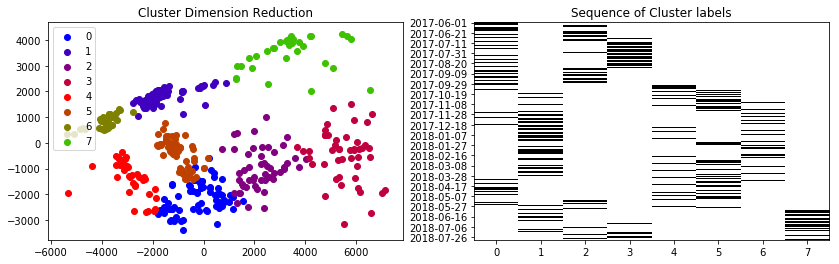

In [4]:
f, ax = plt.subplots(1,2, figsize=(14,4))
plot_cluster_dim_reduction(data.values, kmeans_pp.labels_, ax[0])
plot_cluster_sequence(kmeans_pp.labels_, data.index, ax[1])

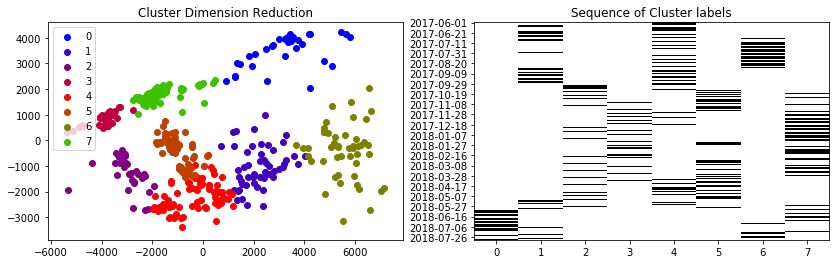

In [5]:
f, ax = plt.subplots(1,2, figsize=(14,4))
plot_cluster_dim_reduction(data.values, kmeans_random.labels_, ax[0])
plot_cluster_sequence(kmeans_random.labels_, data.index, ax[1])

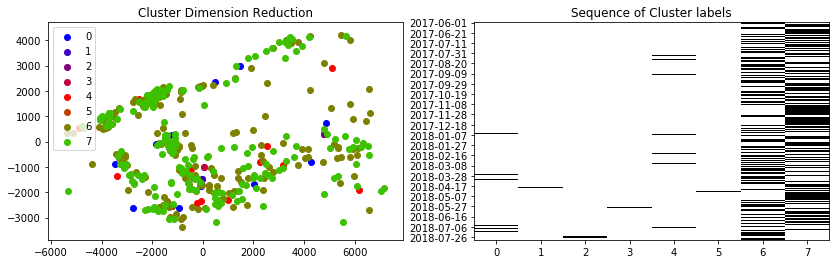

In [6]:
f, ax = plt.subplots(1,2, figsize=(14,4))
plot_cluster_dim_reduction(data.values, kernel_kmeans.labels_, ax[0])
plot_cluster_sequence(kernel_kmeans.labels_, data.index, ax[1])

In [8]:
kernel_kmeans.labels_

array([6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 6, 7, 7, 7, 7, 7, 6,
       7, 6, 6, 7, 7, 7, 6, 7, 7, 0, 7, 6, 6, 6, 7, 6, 6, 7, 7, 7, 6, 7,
       4, 7, 6, 7, 6, 6, 6, 7, 6, 6, 6, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 4,
       7, 7, 7, 6, 6, 6, 7, 4, 4, 6, 6, 6, 0, 7, 7, 7, 7, 6, 7, 6, 6, 6,
       7, 7, 6, 6, 6, 6, 7, 7, 7, 0, 6, 7, 7, 6, 4, 6, 6, 7, 7, 6, 6, 6,
       7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 6, 7,
       6, 7, 6, 6, 7, 6, 0, 7, 7, 6, 7, 6, 6, 7, 6, 7, 6, 6, 6, 7, 7, 7,
       6, 6, 7, 6, 7, 7, 6, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 7, 6, 7, 7,
       7, 6, 7, 6, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 7, 6, 6, 7, 7, 6, 6, 0, 6, 4,
       6, 6, 7, 7, 6, 7, 6, 7, 0, 6, 7, 6, 0, 6, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 6, 6, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 4, 6, 7, 7, 6, 6, 6, 4,
       7, 7, 6, 6, 7, 7, 6, 6, 7, 7, 6, 6, 4, 7, 6, 6, 7, 0, 6, 0, 7, 7,
       6, 7, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 0, 7, 7,

In [15]:
data.index

feat = pd.DataFrame({"label": kernel_kmeans.labels_}, index=pd.to_datetime(data.index))

In [20]:
feat["weekday"] = feat.index.weekday
feat["month"] = feat.index.month

In [22]:
data[kernel_kmeans.labels_==0]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
2017-07-02,2000.01,2035.03,2055.01,1915.03,2090.03,1915.00,1685.02,1675.03,1490.01,1205.03,...,2180.00,2205.00,2155.02,2265.00,2015.02,1950.00,1224.98,910.04,1540.01,2240.01
2017-08-18,2040.02,2110.01,2180.02,2005.03,2005.00,2085.03,1970.01,1505.03,1445.02,1380.01,...,2380.00,2294.98,2265.00,2205.00,2155.02,1939.98,1195.00,925.02,1735.02,2175.01
2017-09-06,2020.02,2050.03,1985.03,2045.01,2020.02,2020.03,1905.02,1815.02,1780.00,1600.03,...,2239.98,2100.00,2094.98,2125.00,1995.02,1774.98,1145.00,875.02,1450.02,2055.02
2017-10-17,1490.02,1460.02,1300.01,1135.01,1550.01,1405.01,1010.02,565.04,535.01,485.02,...,2159.98,1955.00,2049.98,1930.00,1820.00,1610.00,1005.02,690.03,645.02,710.04
2018-01-04,495.03,535.01,515.02,455.02,460.01,540.03,370.01,480.03,485.02,615.01,...,2194.98,2019.99,1964.97,1989.98,1849.99,1504.99,999.98,665.02,655.01,540.03
2018-01-15,655.01,485.02,570.03,365.02,450.00,545.02,400.01,585.04,695.00,905.00,...,2159.98,2109.97,1929.98,1879.99,1869.98,1510.01,915.00,720.03,635.02,565.01
2018-01-19,1485.00,1255.00,1585.00,1085.00,1315.00,1230.00,990.00,485.00,480.00,575.00,...,2230.00,2140.00,1940.00,2045.00,1825.00,1620.00,985.00,820.00,685.00,675.00
2018-03-09,1460.00,1340.00,1545.00,1140.00,1365.00,1340.00,920.00,515.00,535.00,510.00,...,2160.00,1940.00,1990.00,1990.00,1730.00,1585.00,1005.00,740.00,620.00,710.00
2018-03-11,1460.00,1435.00,1655.00,1320.00,1370.00,1220.00,560.00,570.00,470.00,570.00,...,1930.00,1935.00,1940.00,1790.00,1735.00,1530.00,915.00,735.00,690.00,650.00
2018-03-26,1465.00,1460.00,1665.00,1280.00,1515.00,1350.00,1370.00,1010.00,480.00,530.00,...,2025.00,1985.00,1905.00,1900.00,1815.00,1580.00,920.00,735.00,570.00,705.00


In [21]:
feat.groupby("label")["month"].value_counts()

label  month
0      7         4
       1         3
       3         3
       4         2
       6         1
       8         1
       9         1
       10        1
1      4         2
2      7         3
3      5         2
4      7         3
       8         3
       2         2
       4         2
       1         1
       3         1
       5         1
       9         1
5      4         2
6      7        32
       6        23
       1        17
       3        16
       9        16
       10       14
       8        12
       2        11
       5        11
       11       11
       12       11
       4        10
7      6        36
       7        20
       12       20
       11       19
       5        17
       10       16
       2        15
       8        15
       4        12
       9        12
       3        11
       1        10
Name: month, dtype: int64